<div style="padding:15px 20px 20px 20px;border-left:3px solid #87CEFA;background-color:#f0fbff;border-radius: 20px;color:#424242;">

# Notebook Description

## Table of Contents
- **1. Setup**
    - 1.1) Local Setup
    - 1.2) Downloading the Data

- **2. Channel Dataset Analysis**
    - 2.1) General Statistics of the Channel Dataset 
    - 2.2) Example of Channel Data: The Music Category

- **3. Time Series Dataset Analysis**
    - 3.1) Example of Time Series Data: The evolution of some famous channels
    - 3.2) Various distributions of the time series data
    - 3.3) Comparison of the distributions across different categories

- **4. Video Metadata Dataset Analysis**
    - 4.1) Example of Video Metadata Statistics for the Music Category
    - 4.2) 

- **5. Comment Dataset Analysis**
    - 5.1) 
    - 5.2) 

- **6. Ideas we would like to explore** 

</div>

# 1. Setup

## 1.1) Local Setup

In [1]:
# #Install the dependencies
# !pip install -r requirements.txt

In [2]:
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import pandas as pd
import seaborn as sns
import src.utils.plot_config
import matplotlib.pyplot as plt
import src.utils.data_utils as data_utils

# Check if LaTeX is available, if not we don't import the plot_config module
latex_available = False
try:
    plt.rcParams['text.usetex'] = True
    plt.text(0, 0, "Test", fontsize=12)
    latex_available = True
    plt.close()
except Exception as e:
    print("LaTeX is not available. Error:", e)
finally:
    plt.rcParams['text.usetex'] = False 

# Import the plot_config module if LaTeX is available
if latex_available:
    import src.utils.plot_config

In [3]:
ROOT_PATH = os.getcwd()
DATA_PATH = os.path.join(ROOT_PATH, 'data')
TIME_SERIES_PATH = os.path.join(DATA_PATH, 'time_series')
CHANNELS_PATH = os.path.join(DATA_PATH, 'channels')
VIDEO_METADATA_PATH = os.path.join(DATA_PATH, 'video_metadata')

## 1.2) Downloading the Data

In [4]:
# Download the datasets (ordered by size), comment out the ones you don't need 
datasets = [
    # ("https://zenodo.org/records/4650046/files/_raw_df_channels.tsv.gz?download=1", "channels.tsv.gz"), # 6.0 MB
    # ("https://zenodo.org/records/4650046/files/_raw_df_timeseries.tsv.gz?download=1", "time_series.tsv.gz" ), # 571.1 MB
    # ("https://zenodo.org/records/4650046/files/num_comments.tsv.gz?download=1", "num_comments.tsv.gz"), # 754.6 MB
    # ("https://zenodo.org/records/4650046/files/num_comments_authors.tsv.gz?download=1", "num_comments_authors.tsv.gz"), # 1.4 GB
    # ("https://zenodo.org/records/4650046/files/yt_metadata_en.jsonl.gz?download=1", "yt_metadata.jsonl.gz"), # 13.6 GB
    # ("https://zenodo.org/records/4650046/files/youtube_comments.tsv.gz?download=1", "youtube_comments.tsv.gz") # 77.2 GB
]

data_utils.get_data(datasets)

# 2. Channel Dataset Analysis

## 2.1) General Statistics of the Channel Dataset

Here, we start by loading the channel dataset. First, we cast the columns to the appropriate data types. Then, we plot the distribution of the number of channels, subscribers, and videos by category at the crawling time using pie charts. In a last step, we save the channels in separate files for each category.

**Observations:**
- **Number of channels and subscribers**: The `Music` and `Entertainment` categories have the highest number of channels and subscribers.
- **Number of videos**: The number of videos is dominated by the `News & Politics` category, this is due to the high number of news channels that publish multiple videos daily. Still, the `Music` category and `Entertainment` are respectively the second and fourth categories with the highest number of videos.

In [5]:
df_channels = pd.read_csv(f"{DATA_PATH}/channels.tsv.gz", sep="\t", compression="gzip")
df_channels = data_utils.cast_df(df_channels, type='channel')
df_channels.head(3)

,category_cc,join_date,channel,name_cc,subscribers_cc,videos_cc,subscriber_rank_sb,weights
0,Gaming,2010-04-29,UC-lHJZR3Gqxm24_Vd_AJ5Yw,PewDiePie,101000000,3956,3.0,2.087
1,Education,2006-09-01,UCbCmjCuTUZos6Inko4u57UQ,Cocomelon - Nursery ...,60100000,458,7.0,2.087
2,Entertainment,2006-09-20,UCpEhnqL0y41EpW2TvWAHD7Q,SET India,56018869,32661,8.0,2.087


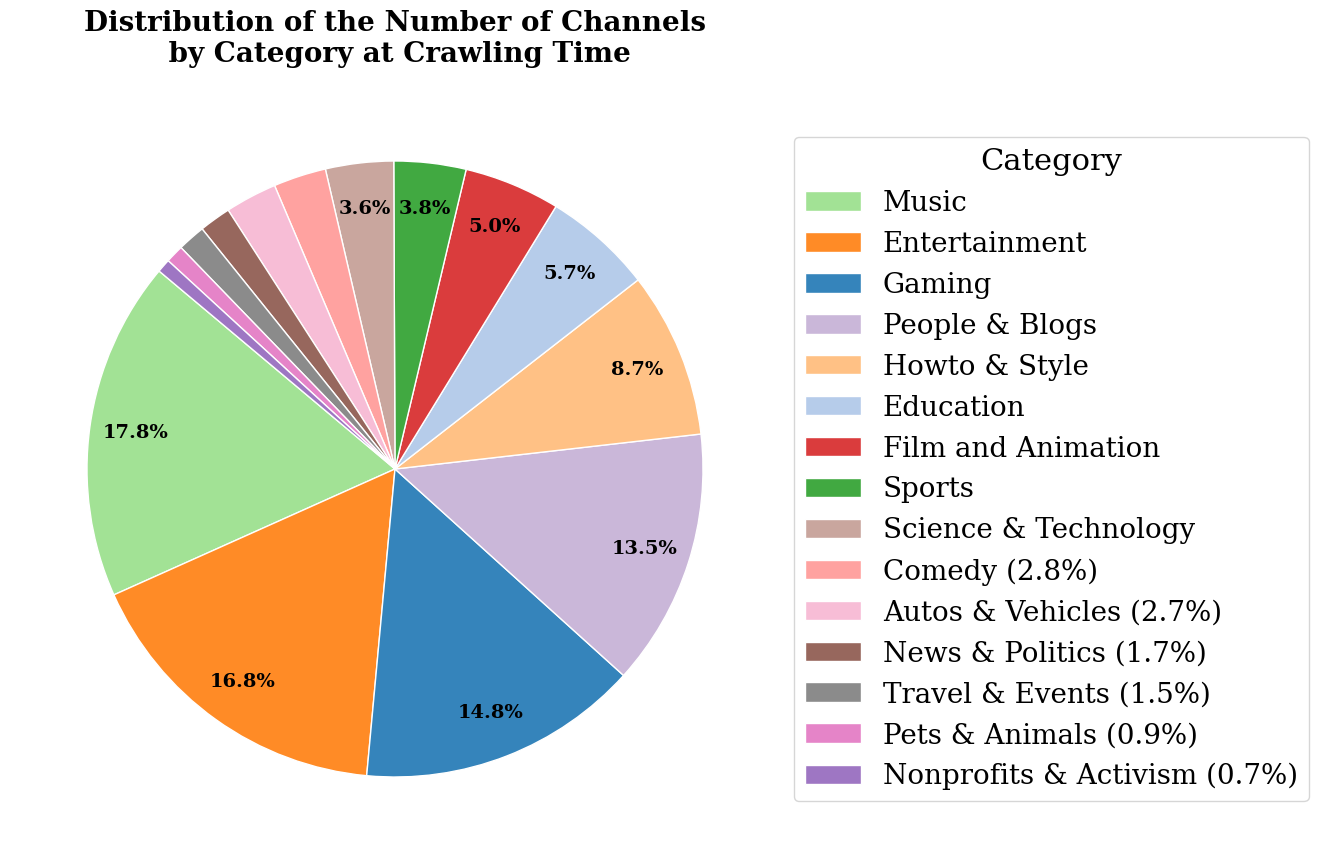

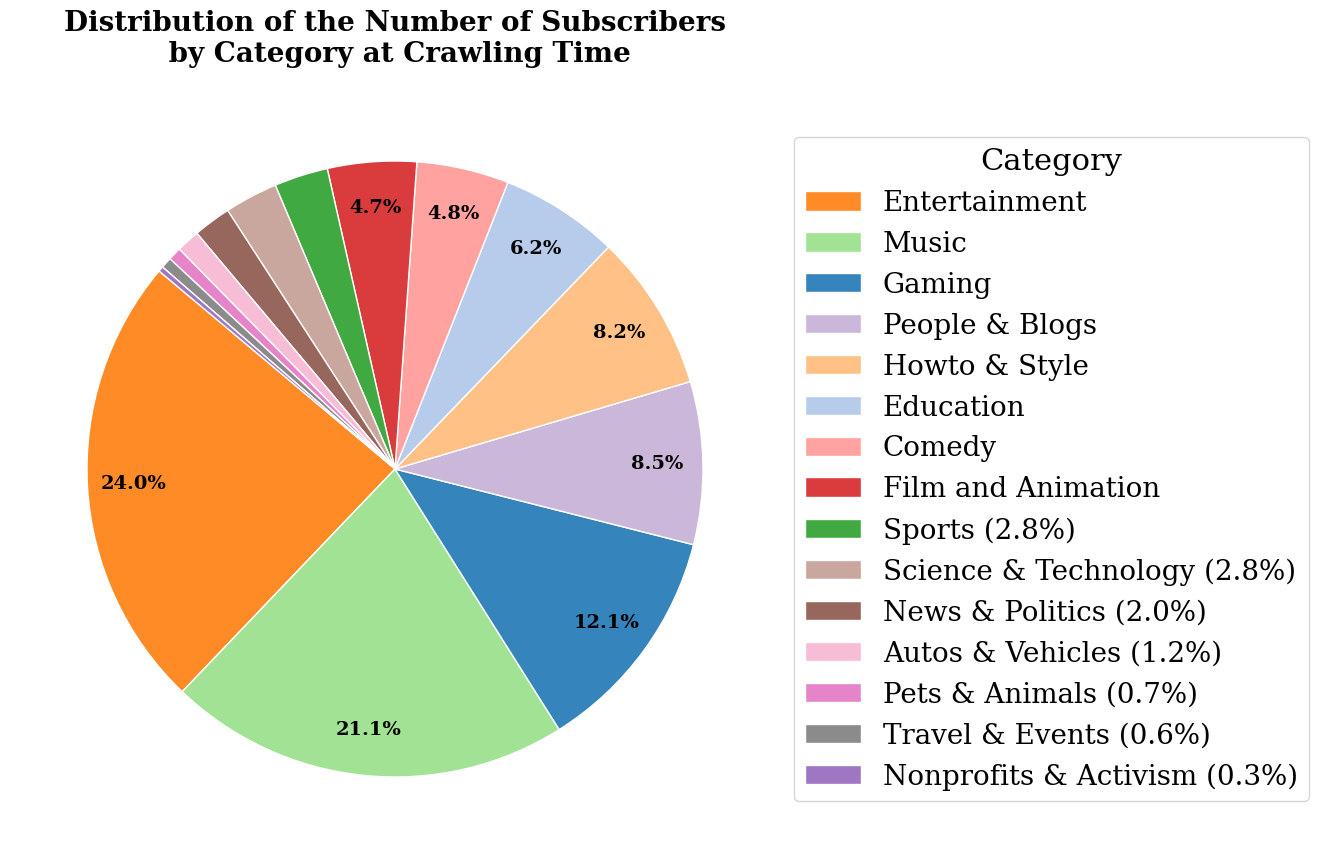

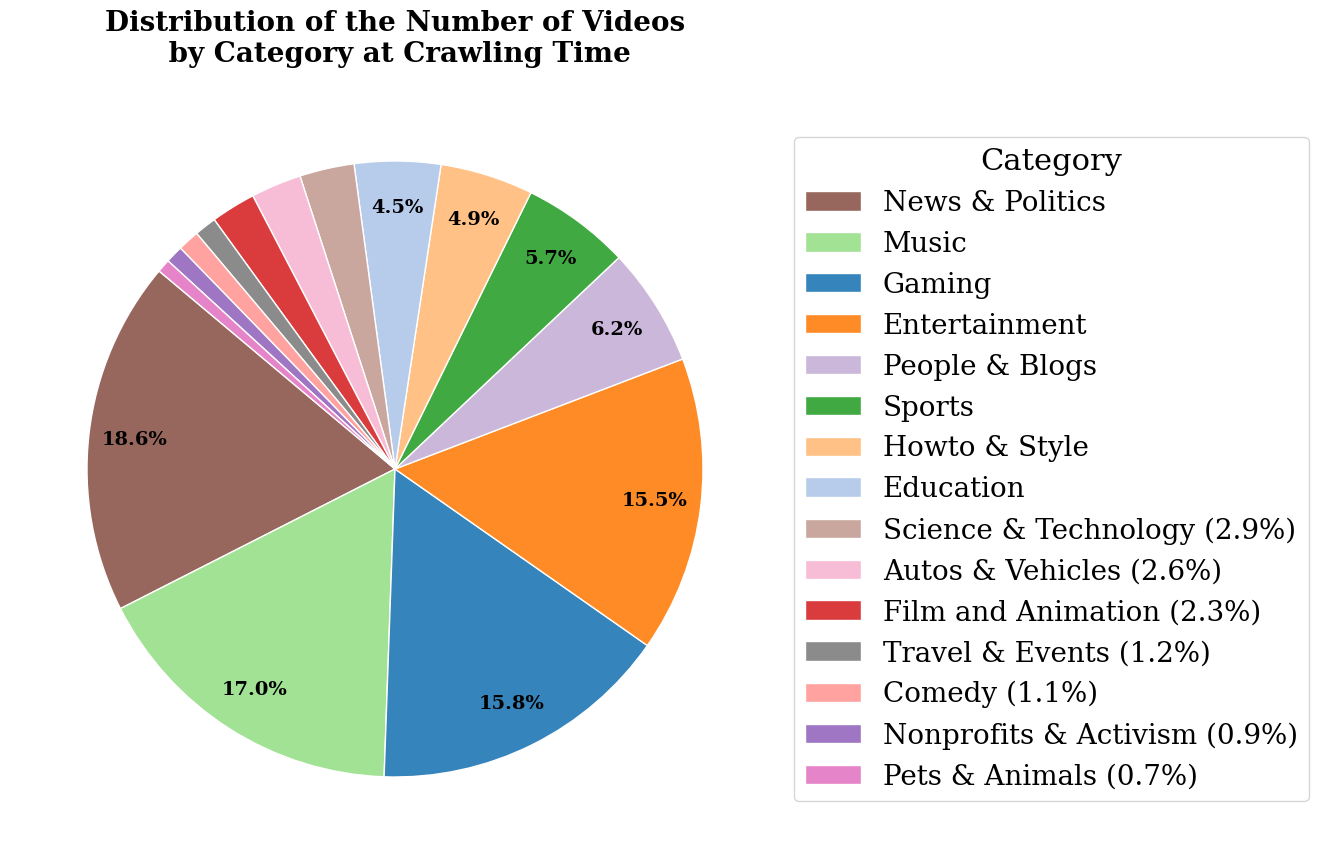

In [6]:
# Get the general statistics of the channel dataset
values = [None, "subscribers_cc", "videos_cc"]
titles = ["Channels", "Subscribers", "Videos"]

for value, title in zip(values, titles):
    data_utils.plot_pie_chart(df=df_channels, 
                              column="category_cc", 
                              values=value, 
                              title=f"Distribution of the Number of {title}\n by Category at Crawling Time")

In [7]:
# For each category, save the channels in a separate file 
data_utils.save_data_grouped_by_category(df_channels, 
                                         column="category_cc", 
                                         output_dir=CHANNELS_PATH, 
                                         overwrite=True, 
                                         verbose=False)

## 2.2) Example of Channel Data: The Music Category

For each category, we can analyze the distribution of the various features. We can also compute the correlation between these quantities. Here, we focus on the `Music` category.

Displaying statistics to study the YouTube channels in the category: Music

The category Music consists of 24285 channels.
The DataFrame occupies 5.51 MB.


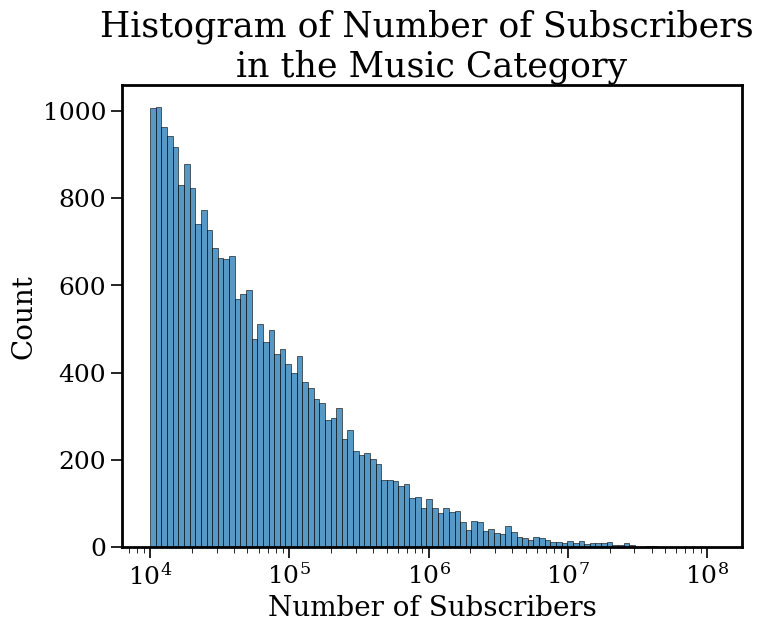

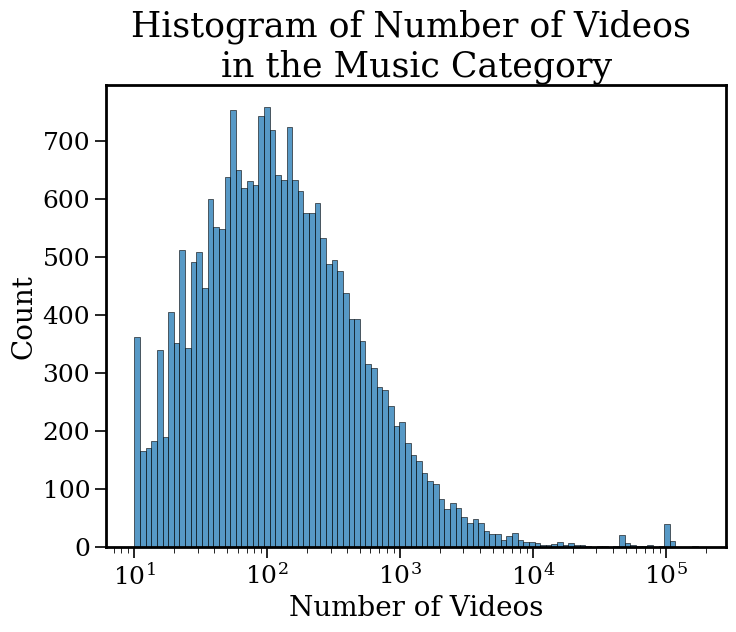

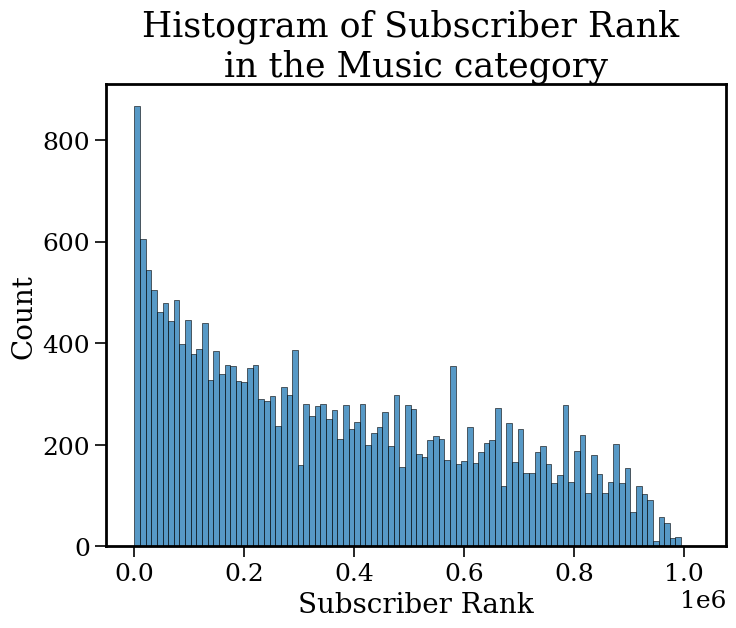

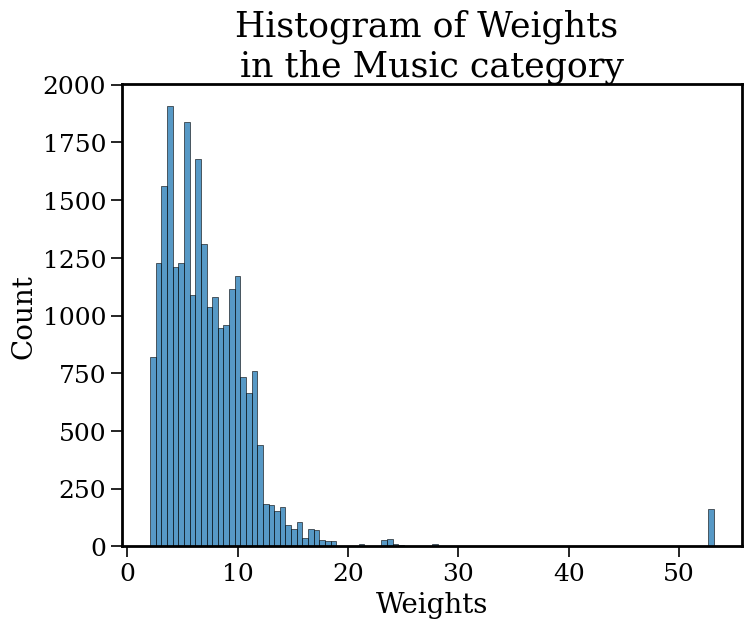

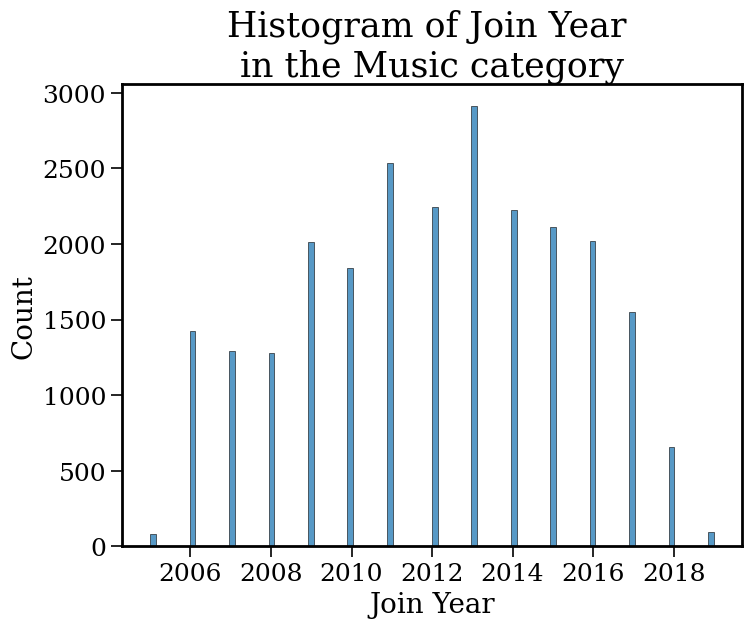

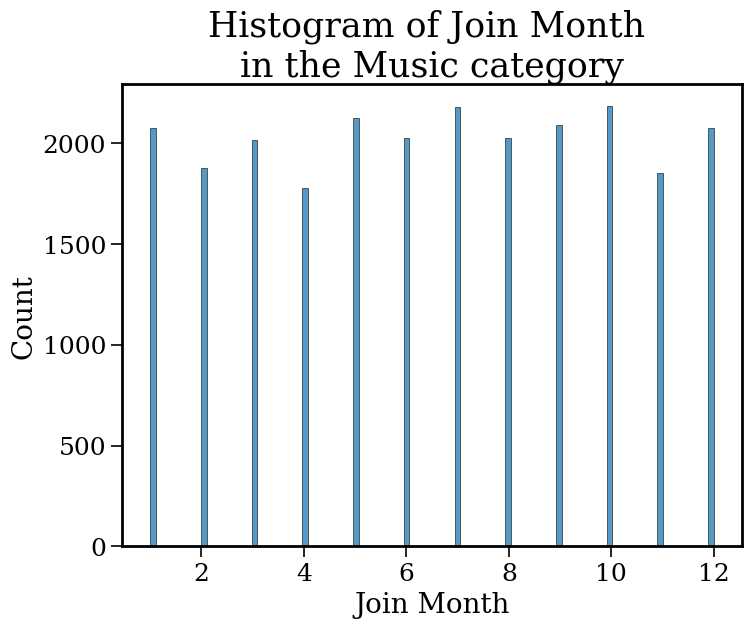

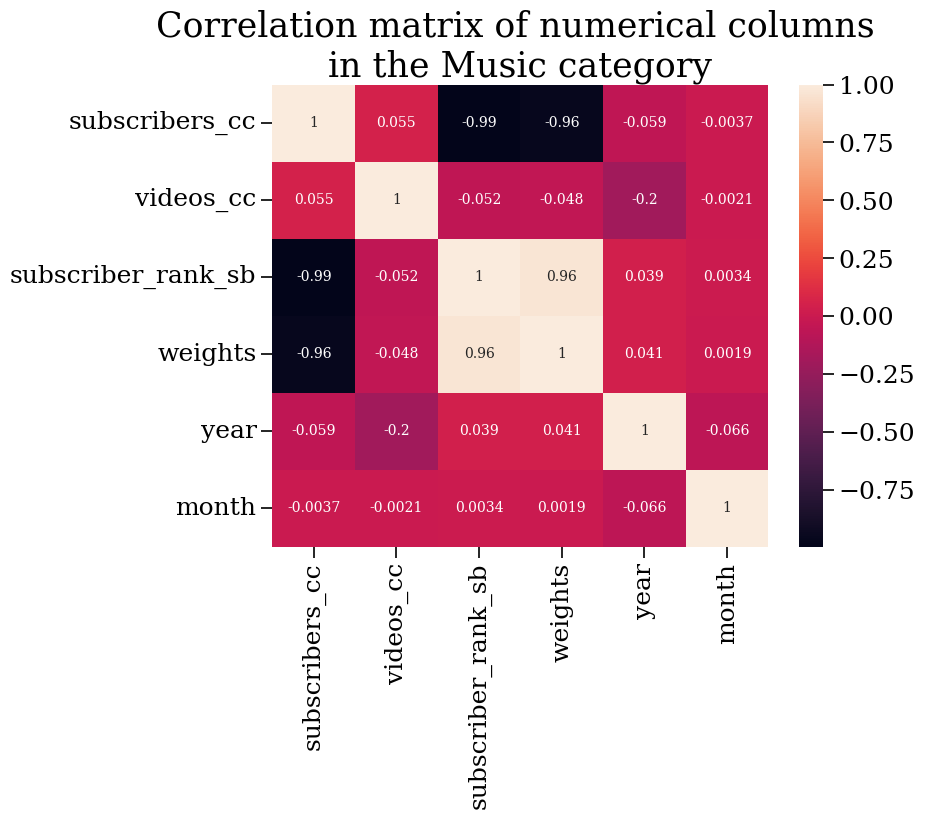

,Type,count,mean,std,min,25%,50%,75%,max,Missing values,Percentage missing
join_date,datetime64[ns],24285,2012-07-19 12:41:53.551575040,NaN,2005-06-25 00:00:00,2009-12-23 00:00:00,2012-09-29 00:00:00,2015-03-04 00:00:00,2019-08-15 00:00:00,0,0.000000
subscribers_cc,int32,24285.0,292134.635948,1600659.370285,10000.0,18200.0,39600.0,127167.0,112139463.0,0,0.000000
videos_cc,int32,24285.0,666.219518,5506.17201,10.0,47.0,113.0,300.0,175300.0,0,0.000000
subscriber_rank_sb,float32,24285.0,366227.21875,271077.125,13.0,124802.0,318630.0,582120.0,1025119.0,0,0.000000
weights,float32,24285.0,7.420398,5.131663,2.087,4.3735,6.5675,9.436,53.143501,0,0.000000
category_cc,string[python],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.000000
channel,string[python],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.000000
name_cc,string[python],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,0.008236


In [8]:
category = "Music"
df_channel_music = pd.read_csv(f"{CHANNELS_PATH}/{category}.tsv.gz", sep='\t', compression='gzip')
df_channel_music = data_utils.cast_df(df_channel_music, type='channel')

data_utils.get_stats_on_category(df_channel_music,
                                 type='channel', 
                                 category_name=category, 
                                 corr_method='spearman', 
                                 verbose=False)

# 3. Time Series Dataset Analysis

In [9]:
df_time_series = pd.read_csv(f"{DATA_PATH}/time_series.tsv.gz", sep="\t", compression="gzip")
df_time_series.head(3)

,channel,category,datetime,views,delta_views,subs,delta_subs,videos,delta_videos,activity
0,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-03 00:00:00,202494.555556,0.000000,650.222222,0.000000,5,0,3
1,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-10 00:00:00,394085.666667,191591.111111,1046.000000,395.777778,6,1,1
2,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-17 00:00:00,835393.750000,441308.083333,1501.500000,455.500000,6,0,1


In [10]:
# For each category, save the time series in a separate file if overwrite is set to True
data_utils.save_data_grouped_by_category(df_time_series, 
                                         column="category", 
                                         output_dir=TIME_SERIES_PATH,
                                         overwrite=False, 
                                         verbose=False)

## 3.1) Example of Time Series Data: The evolution of some famous channels

Let's focus on the `Music` category and particular channels. First, since we only have access to the channel ids (via the `channel` column), we need to merge the channel ids with the channel names available in the `df_channels` dataset under the `name_cc` column.

In [11]:
category = "Music"

# Load the Music time series
df_music_time_series = pd.read_csv(f"{TIME_SERIES_PATH}/{category}.tsv.gz", sep='\t', compression='gzip')
df_music_time_series = data_utils.cast_df(df_music_time_series, type='time_series')

# Load the Music channels
df_music_channels = pd.read_csv(f"{CHANNELS_PATH}/{category}.tsv.gz", sep='\t', compression='gzip')
df_music_channels = data_utils.cast_df(df_music_channels, type='channel')

# Add the channel names to the time series dataset by merging the two datasets
df_music_time_series = data_utils.merge_channel_name(df_music_time_series, df_music_channels, subscriber_rank=True)

In [12]:
df_music_time_series[["channel", "name_cc", "delta_views"]].sample(3)

,channel,name_cc,delta_views
51205,UCNyhY2w6eZe5-VOYK8uvIDw,Mol Mic,34908.815126
3520729,UCUIijn8EdtcTjNt4tbT13qw,ok boi,5546.068182
108986,UCq4bZeYa-eJZjVv791zWpOw,David Larson,8297.870370


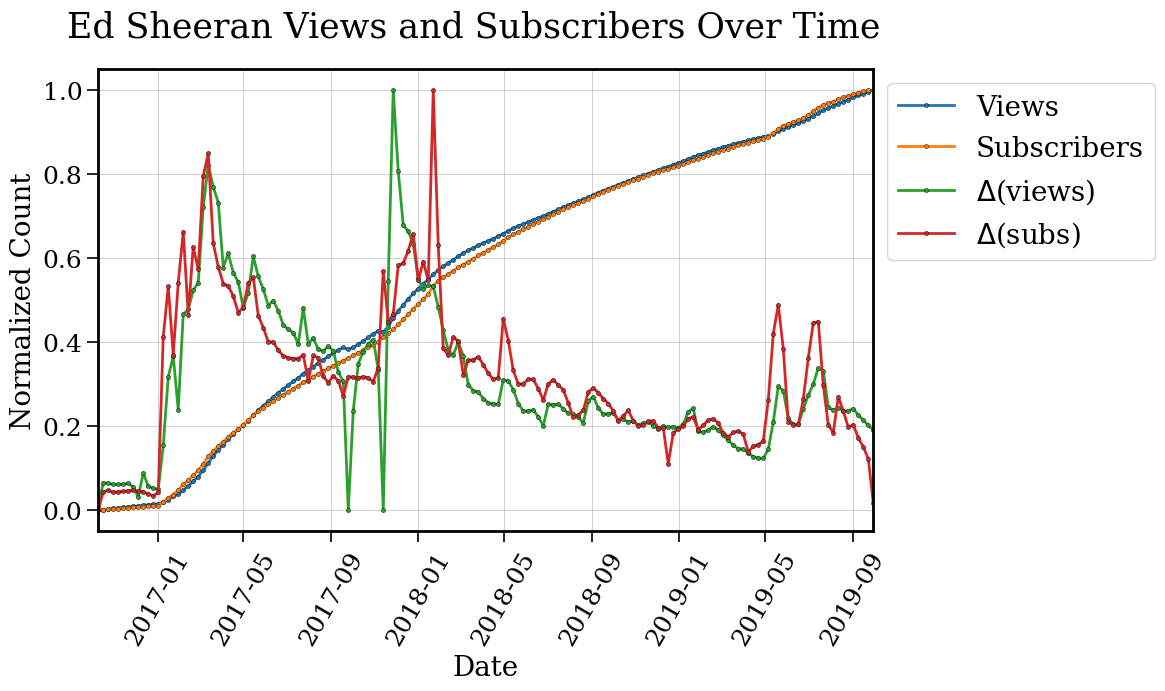

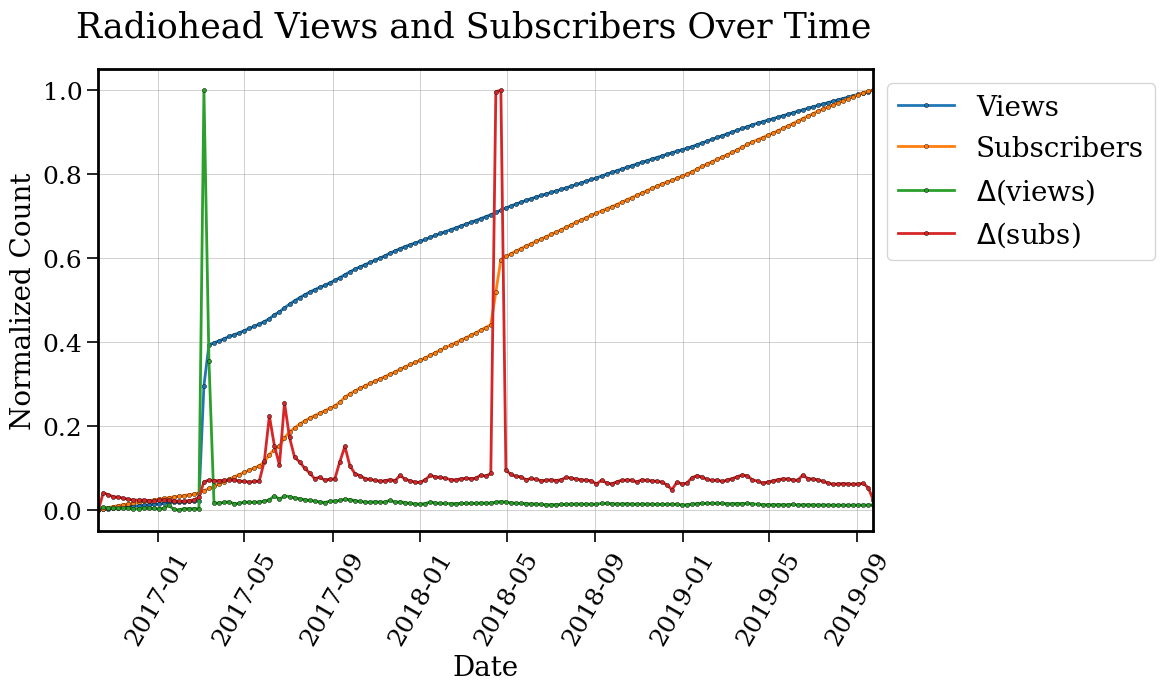

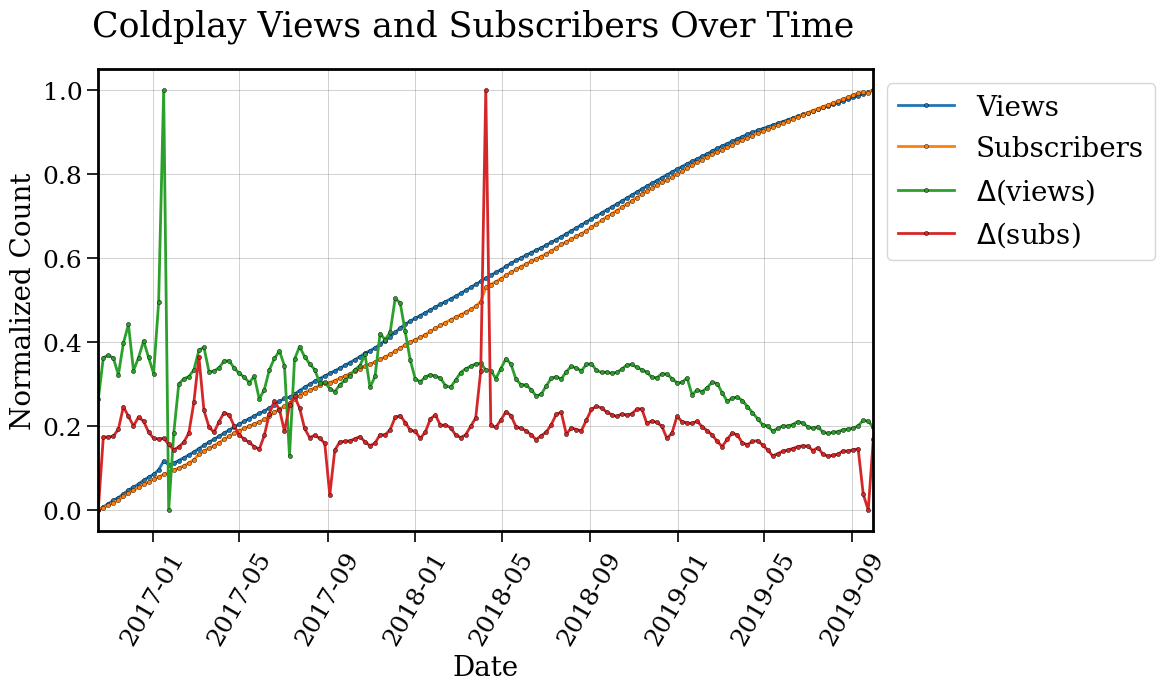

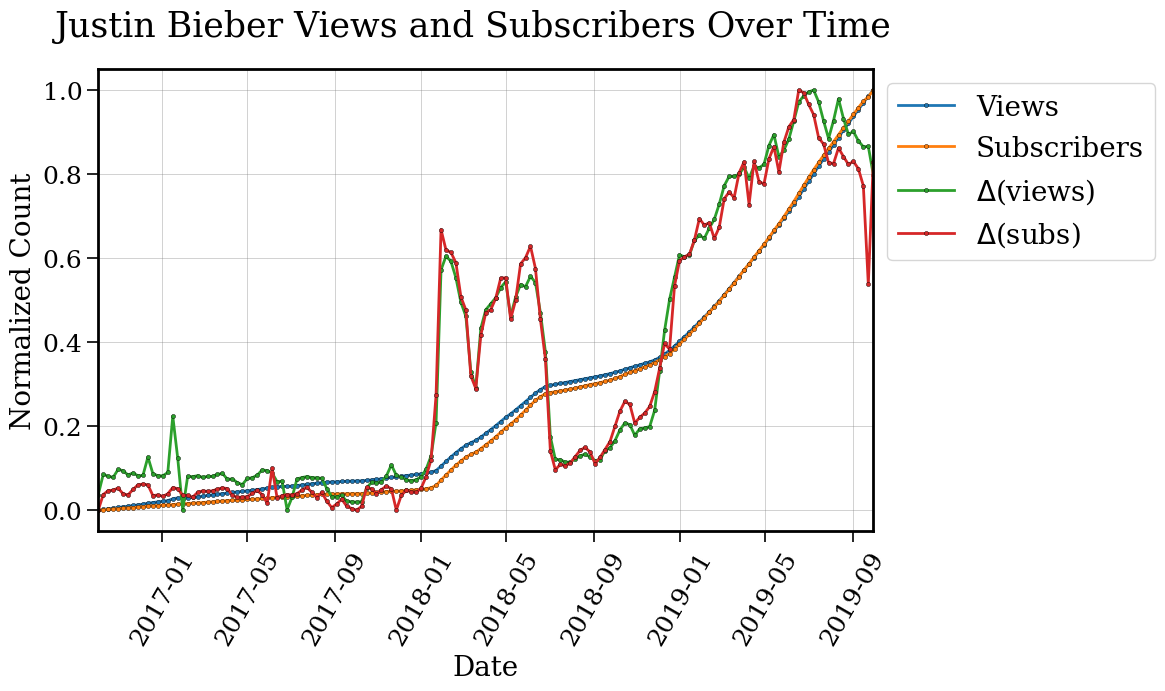

In [13]:
# Here we use normalized data to compare the evolution trend of different channels (not the specific values)
channel_names = ["Ed Sheeran", "Radiohead", "Coldplay", "Justin Bieber"]
for channel_name in channel_names:
    data_utils.plot_channel_time_series(df=df_music_time_series,
                                        channel_name=channel_name,
                                        datetime_col="datetime",
                                        quantities_to_plot=["views", "subs", "delta_views", "delta_subs"],
                                        normalize=True,
                                        palette="tab10",
                                        markers=["."],
                                        title=f"{channel_name} Views and Subscribers Over Time")

## 3.2) Various distributions of the time series data

As for the channel dataset, we can analyze the distribution of the various features in the time series dataset. Here, we again focus on the `Music` category. 

We start by plotting the distribution of the `delta_views`, `delta_subs`, and `delta_videos`, these represent the weekly gains (or losses) in views, subscribers, and videos, respectively.

**Observations for the Music Category:**
- Both the distributions of $\Delta$(views) and $\Delta$(subs) seem close to log-normal distributions (the latter is a bit skewed to the left), with a sharp peak at zero (meaning that many channels do not gain or lose many views or subscribers weekly). This peak could has different contributions: for instance, "dead" channels that do not post new content, or channels that upload monthly or yearly. 
- The distribution of $\Delta$(videos) is power-law distributed as can be seen from the log-log plot.

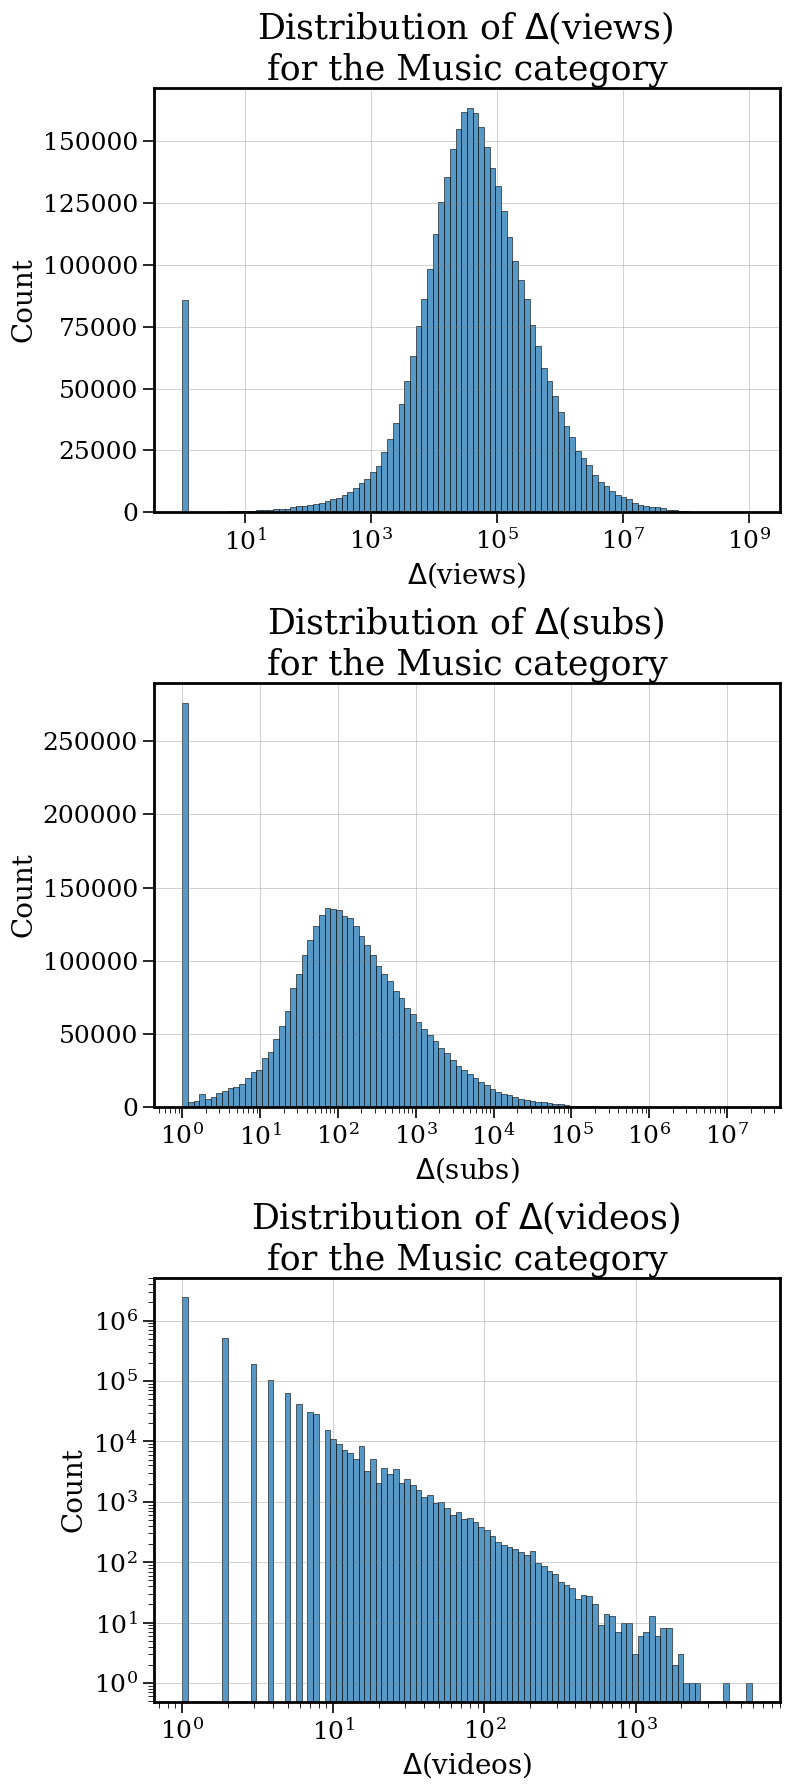

Summary statistics for the ['delta_views', 'delta_subs', 'delta_videos']:
        delta_views    delta_subs  delta_videos
count  3.532411e+06  3.532411e+06  3.532411e+06
mean   5.024196e+05  1.455334e+03  2.250262e+00
std    4.831397e+06  3.365696e+04  1.012890e+01
min    1.000000e+00  1.000000e+00  1.000000e+00
25%    1.270512e+04  3.630556e+01  1.000000e+00
50%    4.314838e+04  1.168889e+02  1.000000e+00
75%    1.612702e+05  4.424583e+02  2.000000e+00
max    1.104146e+09  2.053974e+07  5.860000e+03


In [14]:
data_utils.plot_category_distribution(df_data=df_music_time_series,
                                      columns=["delta_views", "delta_subs", "delta_videos"],
                                      category="Music",
                                      x_logs=[True, True, True],
                                      y_logs=[False, False, True],
                                      kind="hist",
                                      print_summary=True)

## 3.3) Comparison of the distributions across different categories

Something that is more interesting is to compare these distributions across different categories. Let's plot the `delta_views`, `delta_subs`, and `delta_videos` distributions for different categories. 

For example, we expect that the "News & Politics" category has a higher $\Delta$(videos) distribution compared to other categories, as news channels tend to upload multiple videos daily.

The cell bellow plots the histograms for the `delta_views`, `delta_subs`, and `delta_videos` distributions for the categories `News & Politics`, `Travel & Events`, `Music`, and `Education`. We only plot the markers to avoid the overlap of the bars.

We indeed observe that the `News & Politics` category has a heavier tail for the `delta_videos` distribution compared to the other categories. 

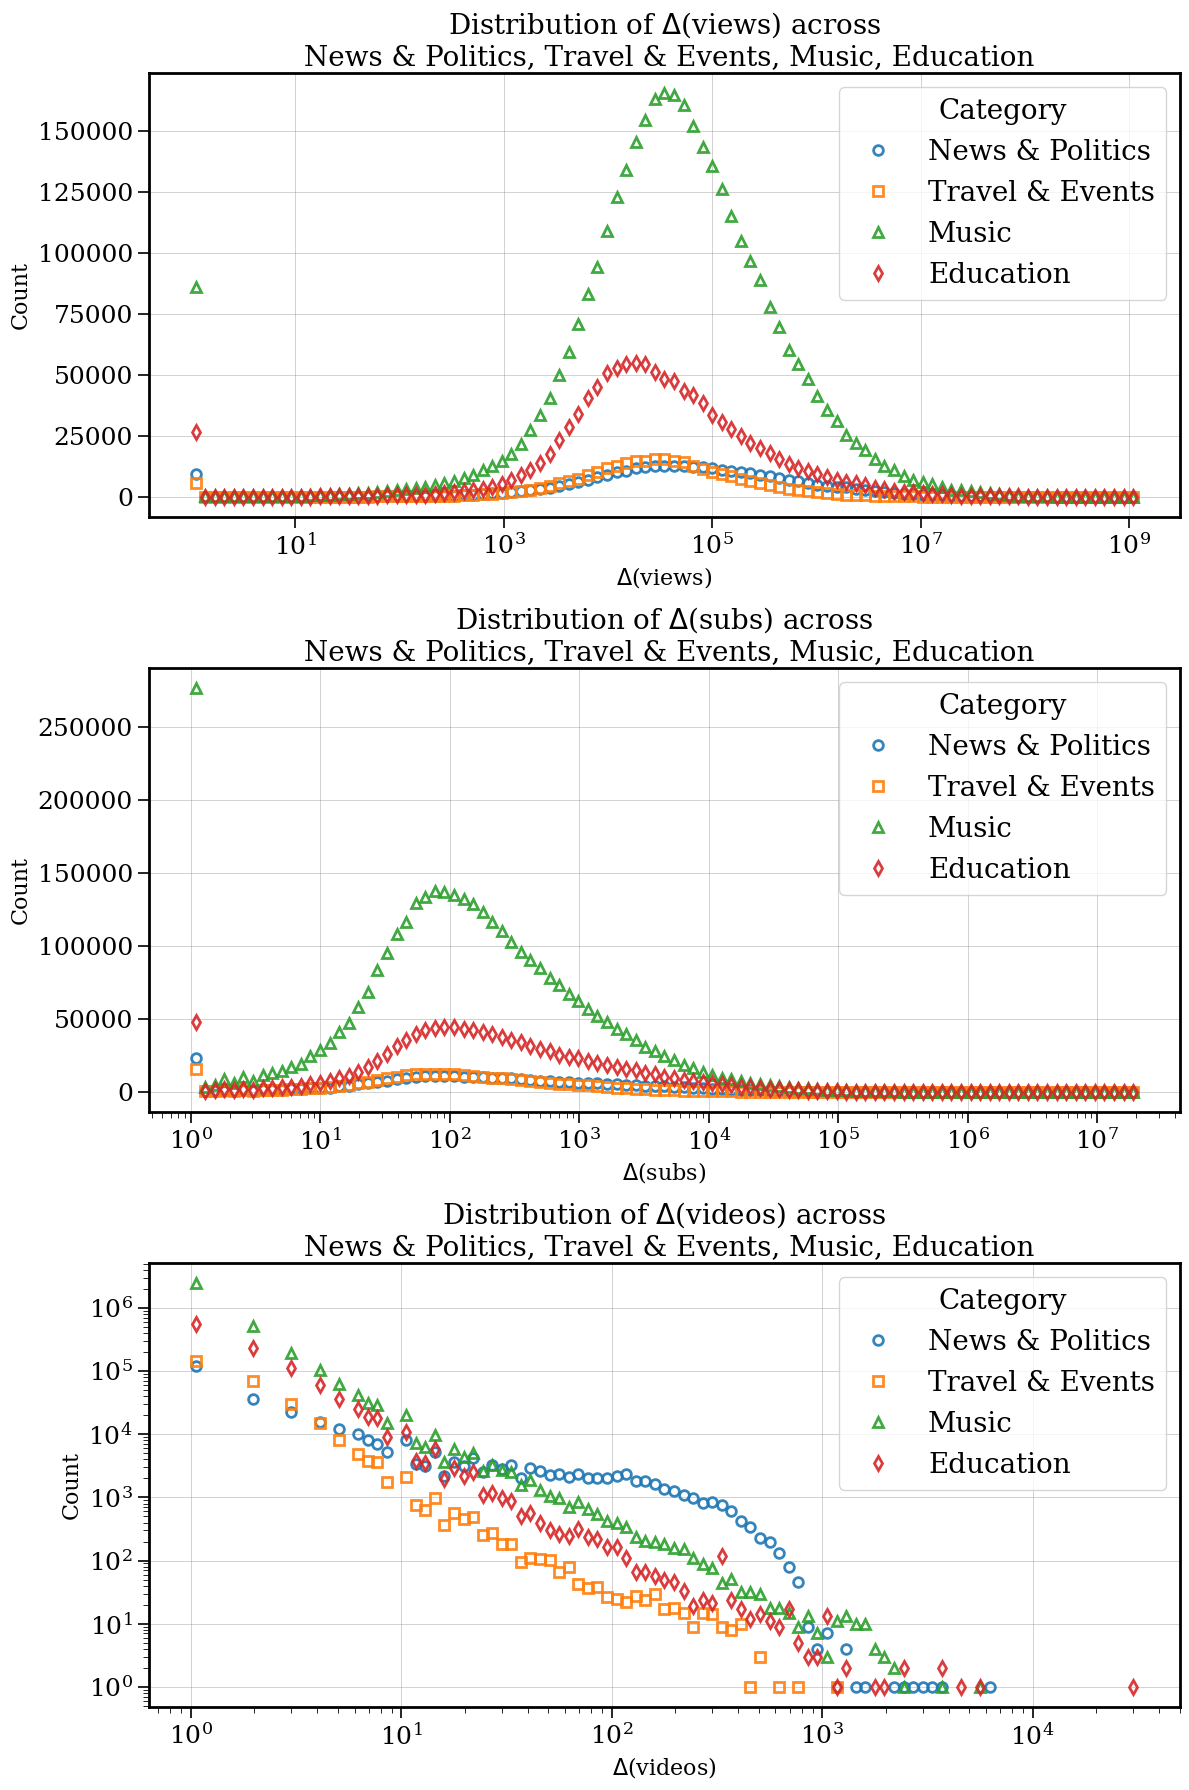

In [15]:
categories = ["News & Politics", "Travel & Events", "Music", "Education"]
data_utils.compare_distribution_across_categories(df_time_series,
                                                  columns=["delta_views", "delta_subs", "delta_videos"],
                                                  hue="category",
                                                  categories=categories,
                                                  x_logs=[True, True, True],
                                                  y_logs=[False, False, True],
                                                  kind="hist", 
                                                  marker_only=True)

# 4. Video Metadata Dataset Analysis

<div style="padding: 15px 20px; border-left: 3px solid red; background-color: #FFC7C7; border-radius: 20px; color: #424242;">
    
**Warning:** The cell below should be run only once (it takes a long time to write the files ~1h30min)
</div>

In [16]:
# Process the metadata file by saving each category in a separate file
# data_utils.process_metadata(f"{DATA_PATH}/yt_metadata.jsonl.gz",
#                             output_dir=VIDEO_METADATA_PATH,
#                             column_to_group="categories",
#                             chunk_size=10_000)

## 4.1) Example of Video Metadata Statistics for the Music Category

In [11]:
category = "Music"
df_metadata_music = pd.read_parquet(f"{VIDEO_METADATA_PATH}/{category}.parquet")
df_metadata_music = data_utils.cast_df(df_metadata_music, type='video_metadata')

,categories,channel_id,crawl_date,description,dislike_count,display_id,duration,like_count,tags,title,upload_date,view_count
0,Movies,UCwaNuezahYT3BOjfXsne2mg,2019-11-11 13:43:24.787451,Let's turn Taylor Swift's OUT OF THE WOODS int...,202,L3thFGDGAS8,229,2146,"Out Of The Woods,out of the woods taylor swift...",Taylor Swift - Out Of The Woods PARODY,2016-01-14 00:00:00,170642
1,Movies,UC6xOVUMstTf08rUgOFbyPEA,2019-11-14 18:04:44.180311,A comical take on the BMC's inefficiency and t...,107,rpUkpMfMWtw,273,3608,"BMC,government og india,government,indian gove...",SnG: BMC! You Screwed Me,2014-10-27 00:00:00,189267
2,Movies,UC4zJAMaYN592qQhMR2OfX_Q,2019-11-02 12:24:26.136129,In no other country in the world does a girl's...,19,9wBn1s_l2kE,190,877,"clisare,irish youtuber,irish girl,funny irish ...",What An Irish Girl's Fake Tan Means | Clisare ...,2015-10-20 00:00:00,32070
3,Movies,UC4zJAMaYN592qQhMR2OfX_Q,2019-11-02 12:24:37.739519,Why do women listen to songs with such degradi...,38,UtUH7-mYBLA,227,576,"clisare,misogynistic,Robin Thicke (Musical Art...",SEXIST SONG LYRICS / Clisare,2013-10-14 00:00:00,36410
4,Movies,UC4zJAMaYN592qQhMR2OfX_Q,2019-11-02 12:23:56.095778,The long-awaited sequel. For the one year anni...,92,fVqOyXdDQTc,110,2836,"clisare,yeousch,irish,girl,ireland,sydney,coll...",Shite Irish Mammies Say // Clisare,2013-02-24 00:00:00,284059


Displaying statistics to study the YouTube videos in the category: music

The category music consists of 8305003 videos.
The DataFrame occupies 14570.41 MB.


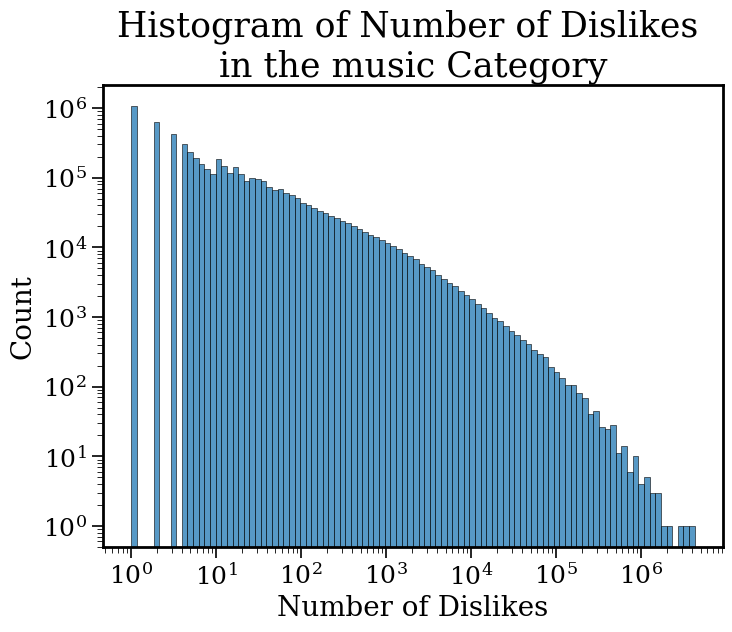

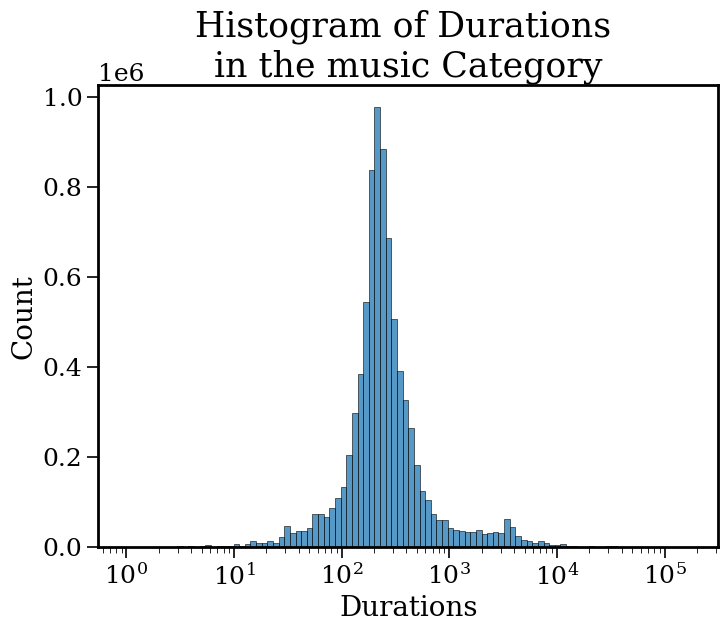

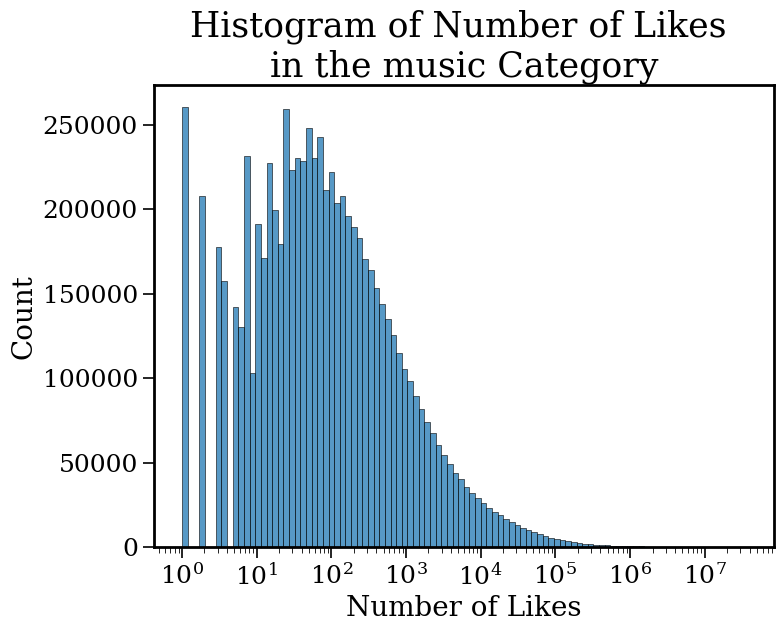

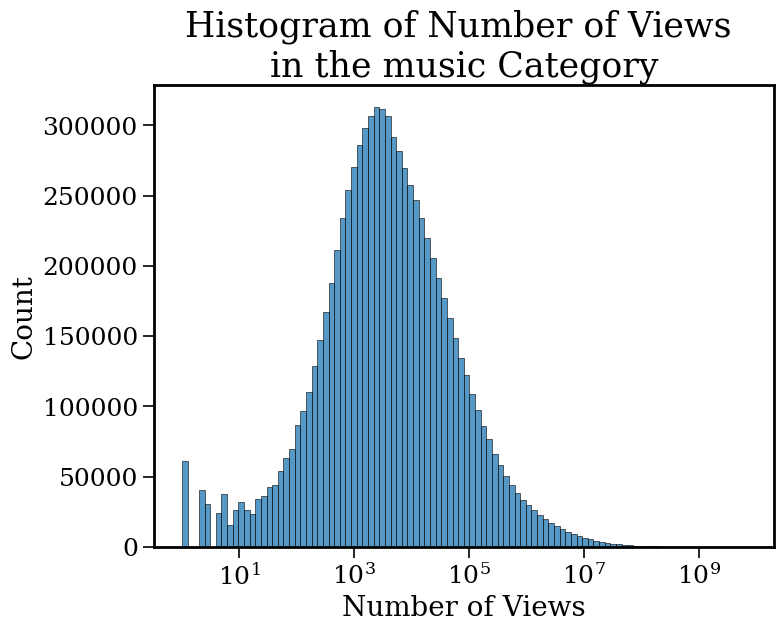

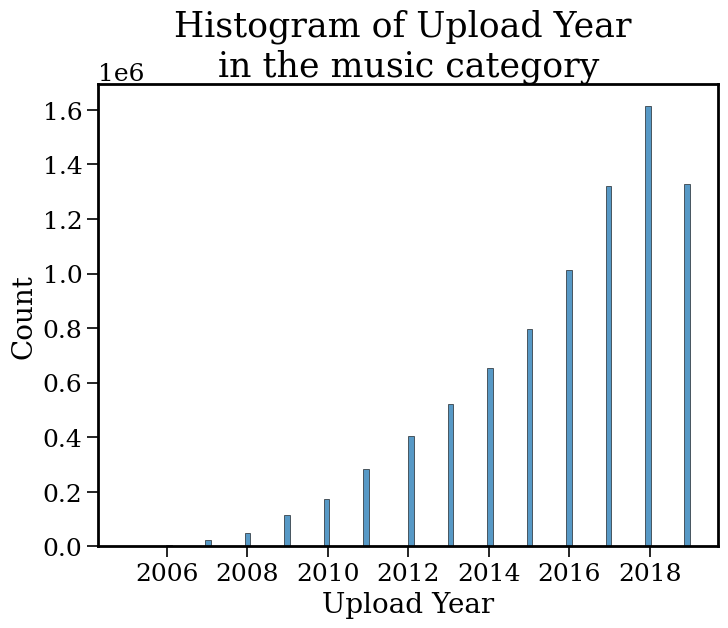

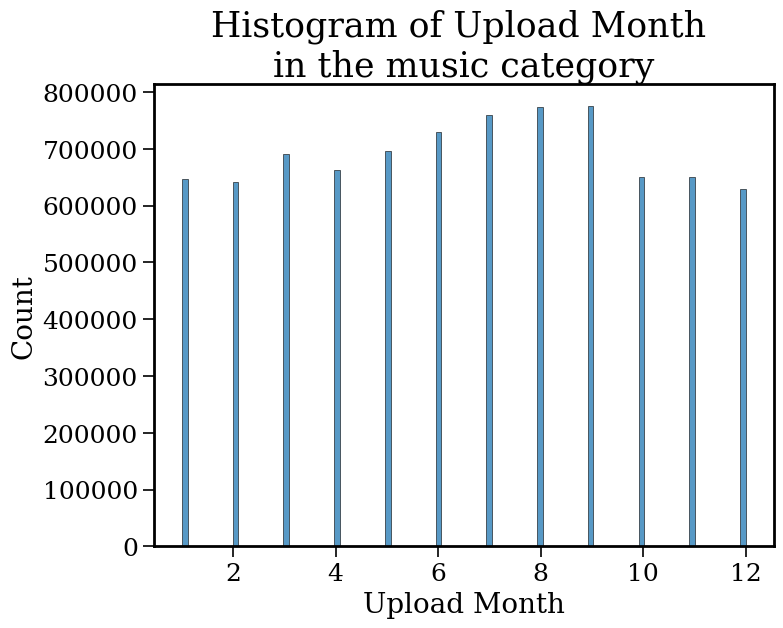

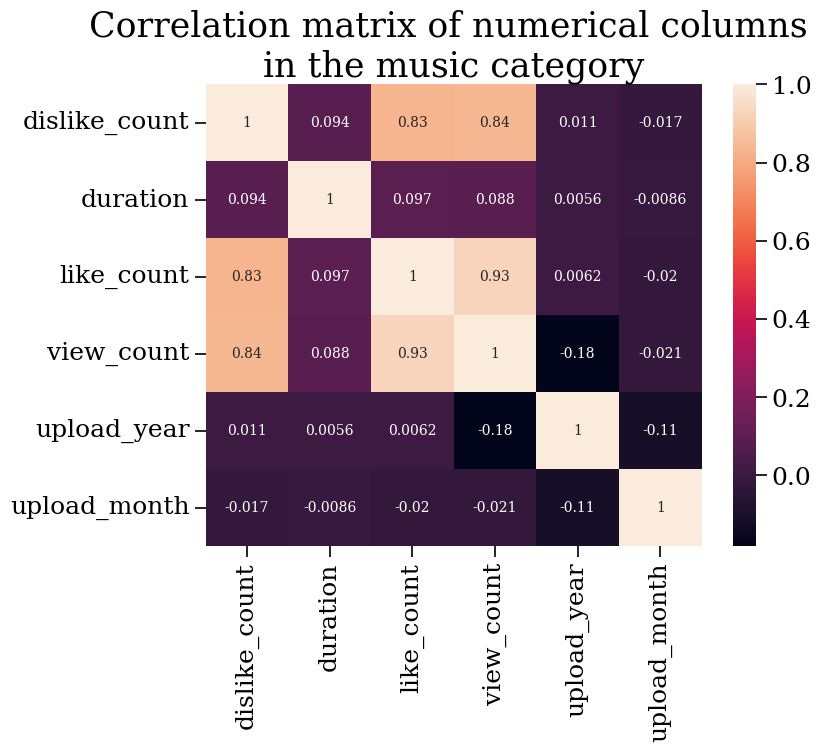

,Type,count,mean,std,min,25%,50%,75%,max,Missing values,Percentage missing
crawl_date,datetime64[ns],8305003,2019-11-10 07:38:19.121897216,NaN,2019-10-29 16:47:24.970666,2019-11-03 03:49:33.599728384,2019-11-10 10:16:15.303284992,2019-11-17 10:19:38.244027136,2019-11-23 15:34:17.741614,0,0.000000
dislike_count,float32,8197981.0,108.778442,4077.240723,0.0,0.0,2.0,9.0,4265883.0,107022,1.288645
duration,int32,8305003.0,471.251079,1366.796104,1.0,172.0,230.0,333.0,172919.0,0,0.000000
like_count,float64,8197981.0,2350.635442,50933.245053,0.0,9.0,50.0,268.0,35287325.0,107022,1.288645
upload_date,datetime64[ns],8305003,2016-05-31 16:32:47.446755328,NaN,2005-11-19 00:00:00,2014-10-13 00:00:00,2017-02-02 00:00:00,2018-07-24 00:00:00,2019-11-20 00:00:00,0,0.000000
view_count,float64,8304989.0,298012.099444,9144052.327531,0.0,655.0,3321.0,19364.0,6509934494.0,14,0.000169
categories,string[python],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.000000
channel_id,string[python],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.000000
description,string[python],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.000000
display_id,string[python],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.000000


In [49]:
data_utils.get_stats_on_category(df_metadata_music,
                                 type='video_metadata', 
                                 category_name='music', 
                                 corr_method='spearman', 
                                 verbose=False)

In [11]:
categories = ["Music", "Education"]
df_metadata_education = pd.read_parquet(f"{VIDEO_METADATA_PATH}/Education.parquet")

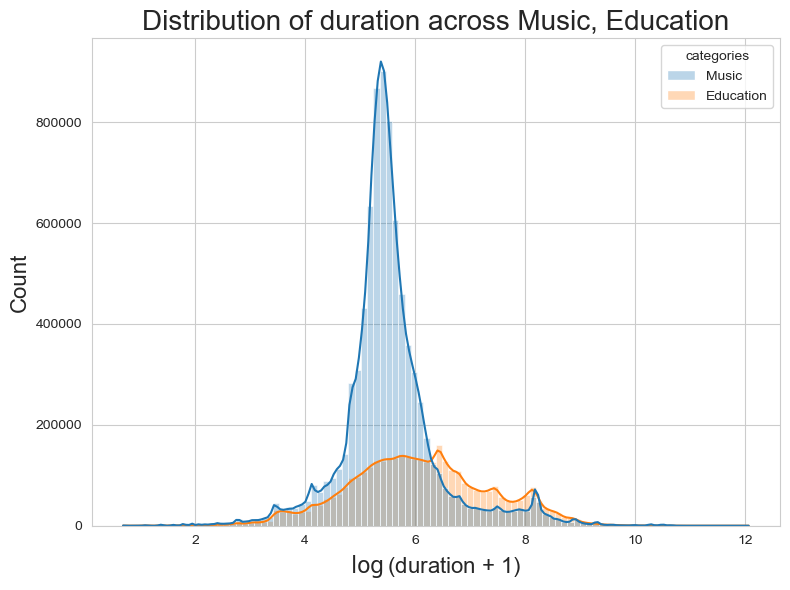

In [13]:
df_metadata_compare =  pd.concat([df_metadata_music, df_metadata_education], axis=0)
data_utils.compare_distribution_across_categories(df_metadata_compare,
                                                  columns=["duration"],
                                                  categories=categories,
                                                  x_logs=[True],
                                                  y_logs=[False],
                                                  kind="hist",
                                                  hue="categories")

# 5. Comment Dataset Analysis

In [79]:
df_num_comments = pd.read_csv(f"{DATA_PATH}/num_comments.tsv.gz", sep="\t", compression="gzip")
df_num_comments.sample(3)

,display_id,num_comms
11065715,eRSDvqK6bl8,1.0
315694,QTv6Zj3UDtg,1.0
42397194,pjOTKlRA7Io,171.0


In [80]:
df_num_comments_authors = pd.read_csv(f"{DATA_PATH}/num_comments_authors.tsv.gz", sep="\t", compression="gzip")
df_num_comments_authors.sample(3)

,author,video_id
227082643,291719135,2
7633558,9807570,1
76765248,98619193,2


In [ ]:
# df_youtube_comments = pd.read_csv(f"{DATA_PATH}/youtube_comments.tsv.gz", sep="\t", compression="gzip")
# df_youtube_comments.sample(3)

# 6. 